<a href="https://colab.research.google.com/github/CroccoRush/Packages/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.2 MB/s 
     |████████████████████████████████| 8.2 MB 5.1 MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize 
import pymorphy2
import difflib as df

print('---------------------------Done---------------------------')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
---------------------------Done---------------------------


In [3]:
# функция для лемматизации текста, на вход принимает список токенов 
def lemmatize_text(tokens):
    # создаем переменную для хранения преобразованного текста
    text_new=''
    # для каждого токена в тексте
    for word in tokens:
        # с помощью лемматайзера получаем основную форму
        word = lemmatizer.parse(word)
        # добавляем полученную лемму в переменную с преобразованным текстом
        text_new = text_new + ' ' + word[0].normal_form
    # возвращаем преобразованный текст
    return text_new

# инициализируем лемматайзер MorphAnalyzer()
lemmatizer = pymorphy2.MorphAnalyzer()

print('---------------------------Done---------------------------')

---------------------------Done---------------------------


In [4]:
#считывание данных из файла
data = pd.read_csv('staff_diplom.csv', on_bad_lines='skip', delimiter = ';')
data.head(20)

#создаем облако всех слов
text = str()
for i in range(int(data.size/5)):
  text += ' '.join([str(data.iloc[i]['title']) if str(data.iloc[i]['title']) != '\'' else ''])
stop_words = stopwords.words('russian')

text = word_tokenize(text)
 
#вызываем функцию лемматизации для списка токенов исходного текста
text = lemmatize_text(text)
wlist = text.split(sep = ' ')
fdist = FreqDist(wlist)

print('---------------------------Done---------------------------')

---------------------------Done---------------------------


---------------------------Done---------------------------


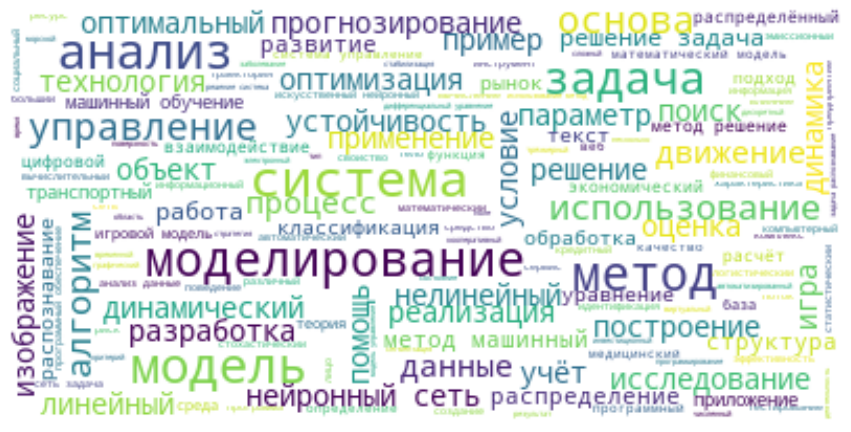

In [5]:
# Выводим облако слов на экран
cloud = WordCloud(max_font_size=25, max_words=400, background_color="white", stopwords=stop_words).generate(text)
fig = plt.figure(figsize=(15,10))

plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')

print('---------------------------Done---------------------------')

In [6]:
themes = {"моделирование":0, "метод машинного обучения":0, "нейронные сети":0, "управление":0, "динамические системы":0, "реализация и разработка алгоритма":0, "оптимизация моделей и систем":0, "прогнозирование":0, "дифференцирование":0, "решение задач":0, "информационные технологии":0, "разработка систем":0, "другое":0}
print(themes)

print('---------------------------Done---------------------------')

{'моделирование': 0, 'метод машинного обучения': 0, 'нейронные сети': 0, 'управление': 0, 'динамические системы': 0, 'реализация и разработка алгоритма': 0, 'оптимизация моделей и систем': 0, 'прогнозирование': 0, 'дифференцирование': 0, 'решение задач': 0, 'информационные технологии': 0, 'разработка систем': 0, 'другое': 0}
---------------------------Done---------------------------


In [7]:
types_of_departments = set()
for dep in data['department']:
  types_of_departments.add(dep)
  
print('---------------------------Done---------------------------')

---------------------------Done---------------------------


In [8]:
themes = {"моделирование":0, "метод машинного обучения":0, "нейронные сети":0, "управление":0, "динамические системы":0, "реализация и разработка алгоритма":0, "оптимизация моделей и систем":0, "прогнозирование":0, "дифференцирование":0, "решение задач":0, "информационные технологии":0, "разработка систем":0, "другое":0}

years = dict()
for i in range(1994, 2022):
  years[str(i)] = {"моделирование":0, "метод машинного обучения":0, "нейронные сети":0, "управление":0, "динамические системы":0, "реализация и разработка алгоритма":0, "оптимизация моделей и систем":0, "прогнозирование":0, "дифференцирование":0, "решение задач":0, "информационные технологии":0, "разработка систем":0, "другое":0}
years["NaN"] = {"моделирование":0, "метод машинного обучения":0, "нейронные сети":0, "управление":0, "динамические системы":0, "реализация и разработка алгоритма":0, "оптимизация моделей и систем":0, "прогнозирование":0, "дифференцирование":0, "решение задач":0, "информационные технологии":0, "разработка систем":0, "другое":0}

masters = {"моделирование":"", "метод машинного обучения":"", "нейронные сети":"", "управление":"", "динамические системы":"", "реализация и разработка алгоритма":"", "оптимизация моделей и систем":"", "прогнозирование":"", "дифференцирование":"", "решение задач":"", "информационные технологии":"", "разработка систем":"", "другое":""}

departments = dict()
for i in types_of_departments:
  departments[str(i)] = {"моделирование":0, "метод машинного обучения":0, "нейронные сети":0, "управление":0, "динамические системы":0, "реализация и разработка алгоритма":0, "оптимизация моделей и систем":0, "прогнозирование":0, "дифференцирование":0, "решение задач":0, "информационные технологии":0, "разработка систем":0, "другое":0}


d = df.Differ()

def similarity(s1, s2):
  try:
    normalized1 = s1.lower()
    normalized2 = s2.lower()
    matcher = df.SequenceMatcher(None, normalized1, normalized2)
    return matcher.ratio()
  except:
    return 0

for i in range(int(data.size/5)):
  means = list()
  max = 0
  tmp = ""
  first = data.iloc[i]['title']

  try:
    year = str(int(data.iloc[i]['year']))
  except:
    year = "NaN"

  master = data.iloc[i]['staffid']

  department = str(data.iloc[i]['department'])
  
  try:
    first = word_tokenize(first)
    first = lemmatize_text(first)
    for key in themes.keys():
      second = key
      second = word_tokenize(second)
      second = lemmatize_text(second)
      diff = similarity(first, second)    
      means.append(diff)
      if diff > max: 
        max = diff
        tmp_themes = key
        tmp_years = year

    if max > 0.25:
      themes[tmp_themes] += 1
      years[year][tmp_themes] += 1 
      masters[tmp_themes] += master + ' '   
      departments[department][tmp_themes] += 1
    else:
      themes["другое"] += 1
      years[year]["другое"] += 1
      masters["другое"] += master + ' '  
      departments[department]["другое"] += 1
  except:
    print(end = '')

print('---------------------------Done---------------------------')

---------------------------Done---------------------------


{'моделирование': 235, 'метод машинного обучения': 414, 'нейронные сети': 110, 'управление': 38, 'динамические системы': 420, 'реализация и разработка алгоритма': 372, 'оптимизация моделей и систем': 687, 'прогнозирование': 111, 'дифференцирование': 58, 'решение задач': 124, 'информационные технологии': 325, 'разработка систем': 203, 'другое': 184}


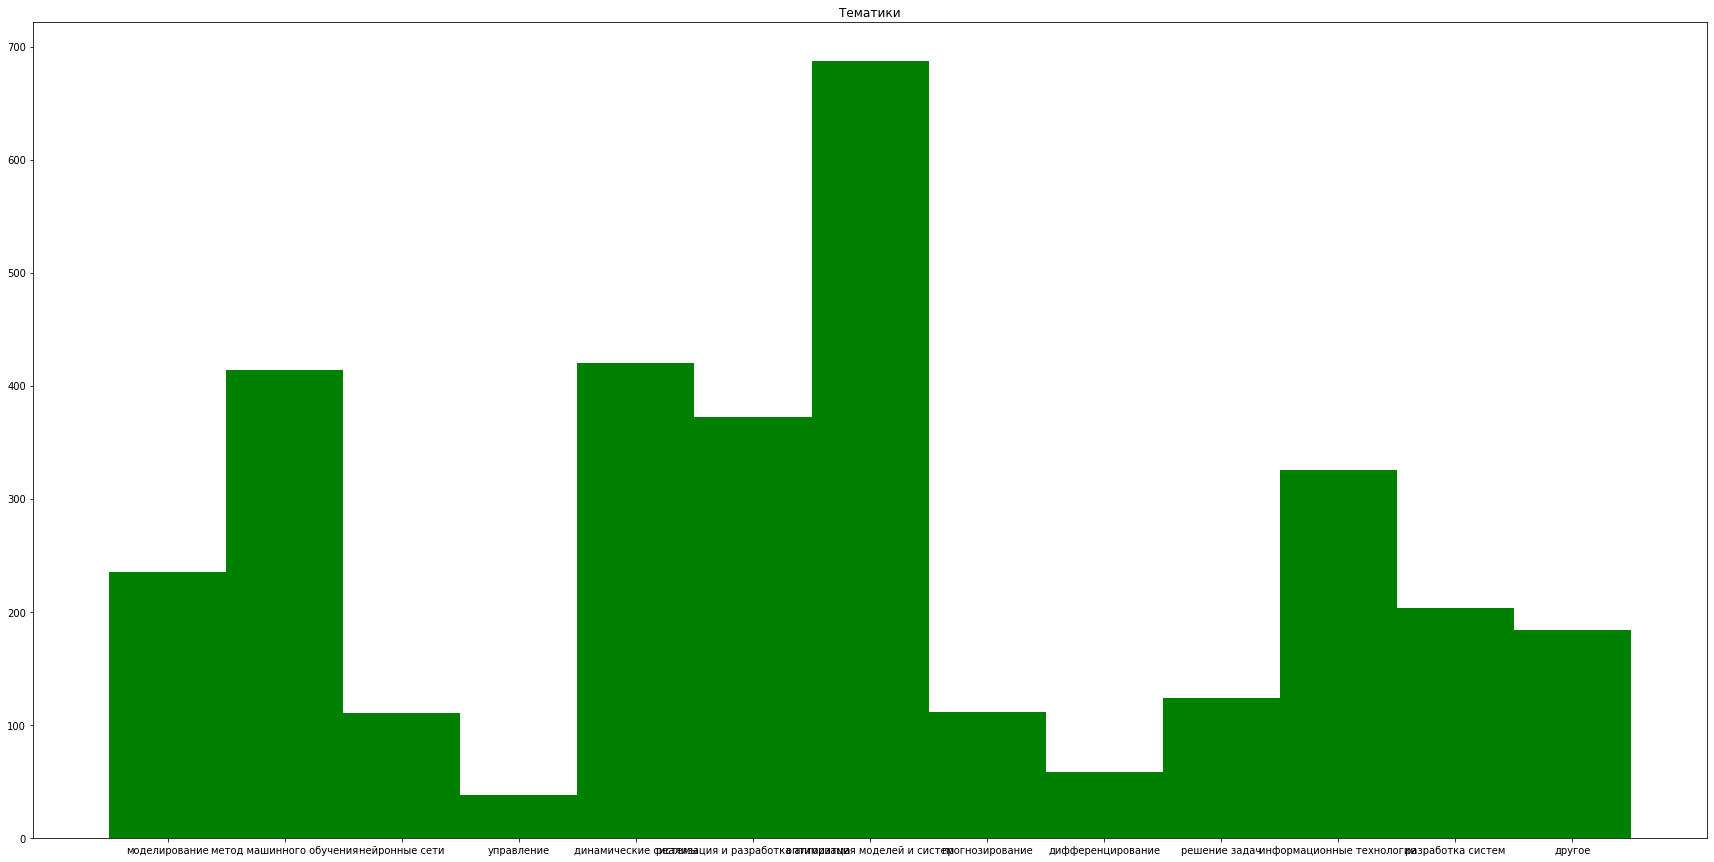

---------------------------Done---------------------------


In [9]:
#вывод тем по тематикам

print(themes)
fig = plt.figure(figsize=(30, 15))  
plt.bar(themes.keys(), themes.values(), width=1, color='g')      
plt.title("Тематики")          
plt.show()

print('---------------------------Done---------------------------')

In [10]:
#вывод преподавателей по тематикам

for theme, master in masters.items():
  fmasters = FreqDist(master.split(sep = ' '))
  secondName, valuse = fmasters.most_common(1)[0]
  print(theme, ': ', secondName, ' - ', valuse)

print('---------------------------Done---------------------------')

моделирование :  nikiforov  -  15
метод машинного обучения :  grishkin  -  26
нейронные сети :  kozynchenko  -  18
управление :  potockaya  -  4
динамические системы :  petrosjan  -  23
реализация и разработка алгоритма :  stuchenkov  -  14
оптимизация моделей и систем :  kolbin  -  31
прогнозирование :  pankratova_y_b  -  6
дифференцирование :  grishkin  -  6
решение задач :  tamasyan  -  7
информационные технологии :  korhov  -  19
разработка систем :  degtiarev  -  13
другое :  blekanov  -  13
---------------------------Done---------------------------


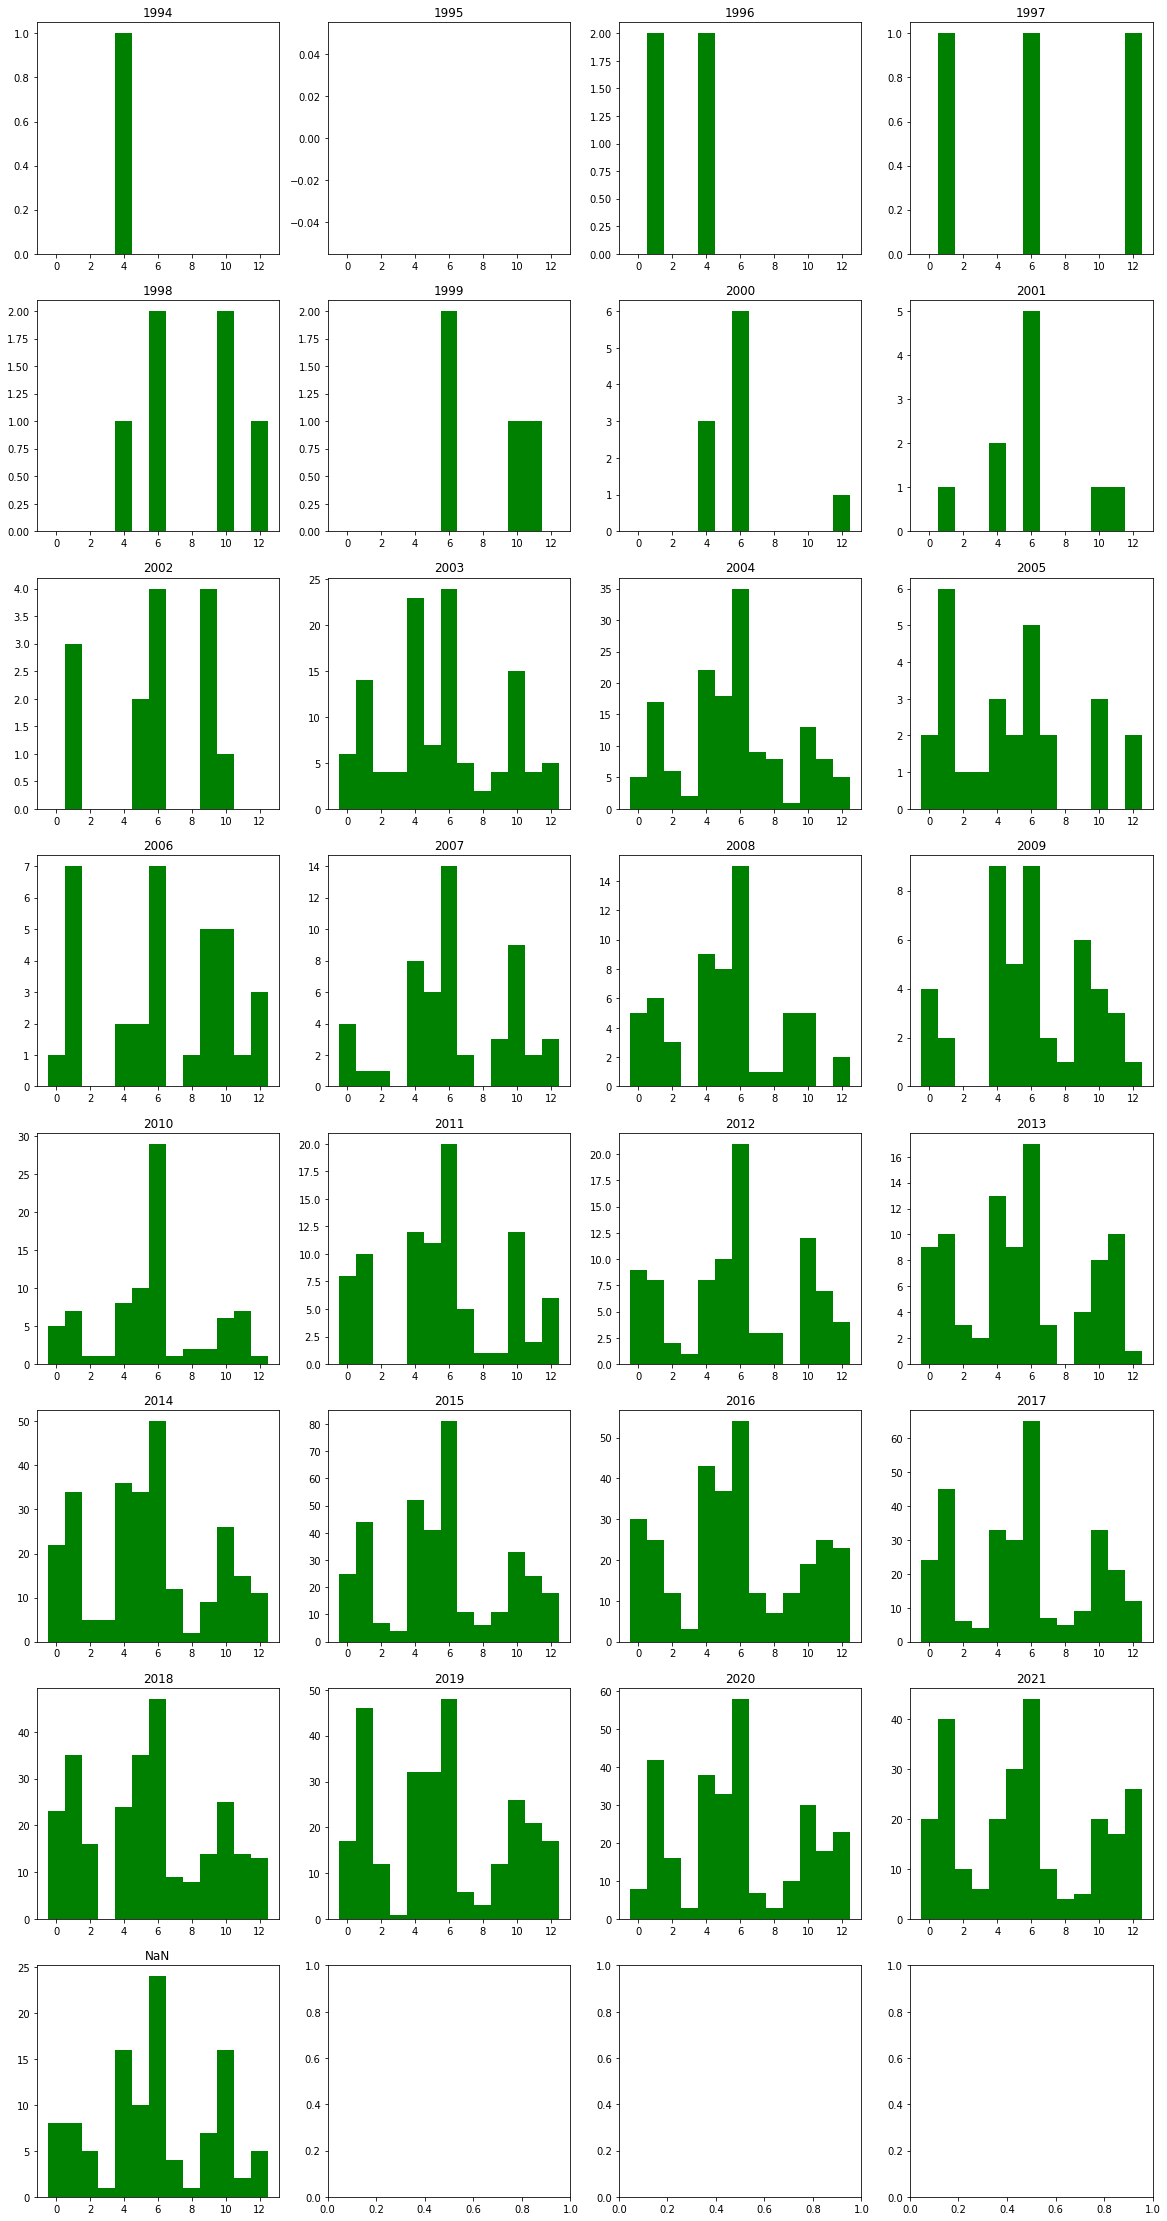

---------------------------Done---------------------------


In [19]:
#вывод тематик по годам

rows = int(len(years)/4) + 1
columns = 4
k=0
fig, ax = plt.subplots(rows, columns, figsize=(20,40))
for year, theme in years.items():  
  ax[int(k / 4)][int(k % 4)].bar(range(13), theme.values(), width=1, color='g')  
  ax[int(k / 4)][int(k % 4)].set_title(year)
  k+=1               
plt.show()

print('---------------------------Done---------------------------')

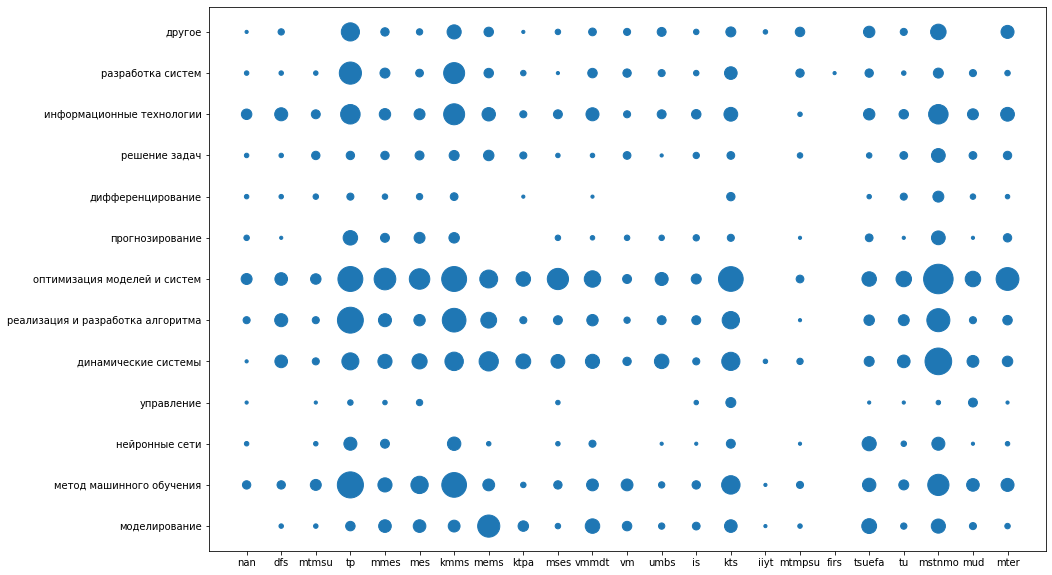

---------------------------Done---------------------------


In [12]:
dataf = pd.DataFrame(columns=["department", "themes", "means"])

for tmpdepartment, tmpdata in departments.items():
  for tmpthemes, tmpmeans in tmpdata.items():
    new_row = {"department": tmpdepartment, "themes": tmpthemes, "means": float(tmpmeans)}
    dataf = dataf.append(new_row, ignore_index=True)

fig = plt.figure(figsize=(15,10))
plt.scatter(x=dataf["department"], 
            y=dataf["themes"],
            s=dataf["means"]*10)
plt.show()

print('---------------------------Done---------------------------')

---------------------------Done---------------------------


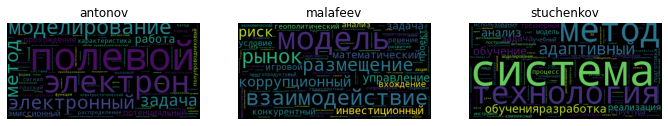

In [13]:
#создаем облако слов для каждого преподавателя
teachers = dict()

for i in range(int(data.size/5)):
  if data.iloc[i]['staffid'] not in teachers:
    teachers[data.iloc[i]['staffid']] = data.iloc[i]['title']
  else:
    teachers[data.iloc[i]['staffid']] += ''.join([str(data.iloc[i]['title']) if str(data.iloc[i]['title']) != '\'' else ''])


fig = plt.figure(figsize=(20,14))
rows = 2
columns = 5

k = 0
for pair in teachers.items():
  if k == 3: 
    break
  k+=1
  teacher, words = pair
  words = word_tokenize(words)
  words = lemmatize_text(words)
  fig.add_subplot(rows, columns, k)
  cloud = WordCloud(stopwords=stop_words).generate(words)
  # Выводим облако слов на экран
  plt.imshow(cloud)
  # Отключаем отображение осей
  plt.axis('off')
  plt.title(teacher)

print('---------------------------Done---------------------------')

---------------------------Done---------------------------


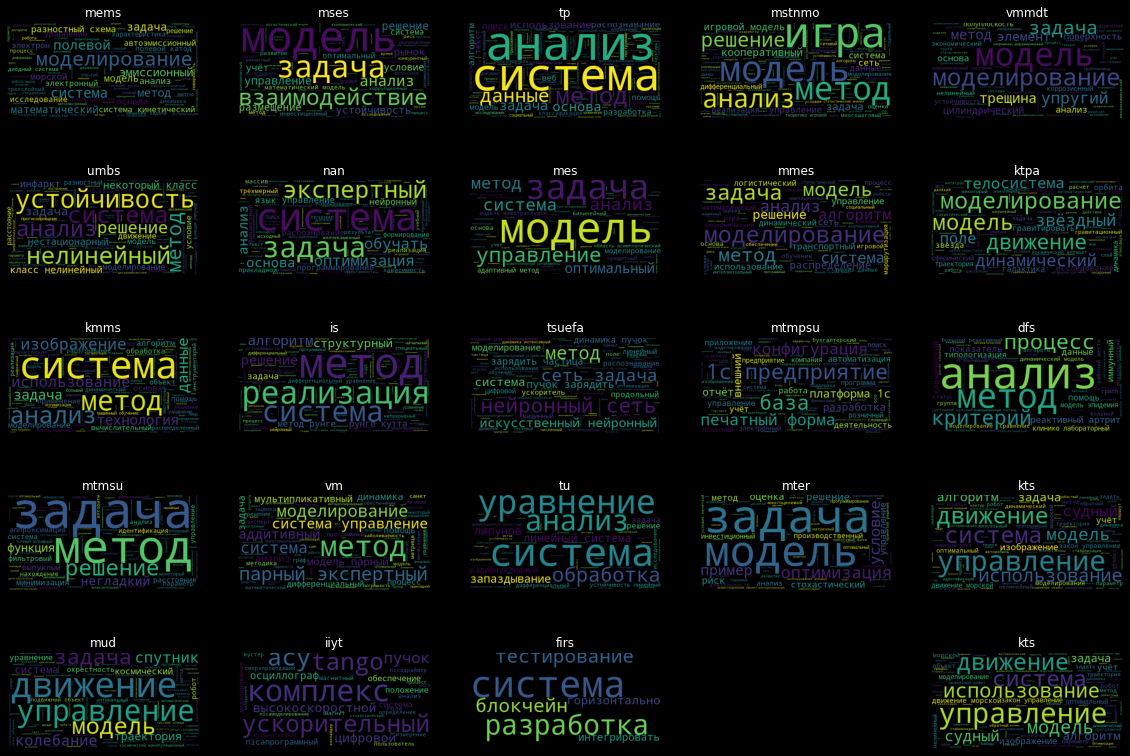

In [51]:
#создаем облако слов для каждой кафедры
departmanets = dict()

for i in range(int(data.size/5)):
  if data.iloc[i]['department'] not in departmanets:
    departmanets[data.iloc[i]['department']] = data.iloc[i]['title']
  else:
    departmanets[data.iloc[i]['department']] += ''.join([str(data.iloc[i]['title']) if str(data.iloc[i]['title']) != '\'' else ''])


fig = plt.figure(figsize=(20,14))
rows = 5
columns = 5

k = 0
for pair in departmanets.items():
  #if k == 3: 
  #  break
  k+=1
  department, words = pair
  words = word_tokenize(words)
  words = lemmatize_text(words)
  fig.add_subplot(rows, columns, k)
  cloud = WordCloud(stopwords=stop_words).generate(words)
  # Выводим облако слов на экран
  plt.imshow(cloud)
  # Отключаем отображение осей
  plt.axis('off')
  plt.title(department)

for pair in departmanets.items():
  department, words = pair
  if department == "kts":
    words = word_tokenize(words)
    words = lemmatize_text(words)
    fig.add_subplot(rows, columns, 25)
    cloud = WordCloud(stopwords=stop_words).generate(words)
    # Выводим облако слов на экран
    plt.imshow(cloud)
    # Отключаем отображение осей
    plt.axis('off')
    plt.title(department)  

print('---------------------------Done---------------------------')